<a href="https://colab.research.google.com/github/kozyreviva/Data_Science/blob/main/Fp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ ТИМЛИДА</u></b>

Здравствуй Иван!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

#Промышленность — задача проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
ок, это хороший тон - дать описание проблематики.

##Работа с данными

In [52]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
#Загрузка библиотек
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold

###Загрузка датасета

Загрузим необходимые датасеты.

In [54]:
#Загрузка и сохранение таблиц
try:
  df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
  df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
  df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
  df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
  df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
except:
  df_arc = pd.read_csv('data_arc.csv')
  df_bulk = pd.read_csv('data_bulk.csv')
  df_gas = pd.read_csv('data_gas.csv')
  df_temp = pd.read_csv('data_temp.csv')
  df_wire = pd.read_csv('data_wire.csv')

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ОК, данные на базе)</p>
</div>

Выведем таблицы и информацию о них.

In [55]:
#Вывод таблицы
df_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [56]:
#вывод информации
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [57]:
#Вывод талблицы
df_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [58]:
#Вывод информации
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [59]:
#Вывод таблицы
df_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [60]:
#Вывод информации
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [61]:
#Вывод таблицы
df_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [62]:
#Вывод информации
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [63]:
#Вывод таблицы
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#Вывод информации
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


### Первичные выводы


Загруженные датасеты представляют собой отдельные категории данных из процесса обработки металла. Видна связь между таблицами. 

**Исходя из таблиц можно выделить некоторые моменты:**

* В каждой таблице есть признак 'key' который связывает все датасеты. По нему можно производить объединение таблиц.  
* Некоторые таблицы имеют неправильный регистр в названиях столбцов. 
* В данных имеютстя пропуски которые следует удалить или заполнить.
* Некоторые данные следует привести к нужному типу.

Дальнейшие результаты наблюдений будут доступны в ходе подробного рассмотрения таблиц.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Чёткий первичный анализ на месте, ОК!</p>
</div>

### Анализ данных

#### Обработа ошибок

Изменим язык названия столбцов и приведём к змеиному регистру.

In [65]:
#Изменение названий столбцов
df_arc.rename(columns = {'Начало нагрева дугой' : 'start_heat',
                         'Конец нагрева дугой':'end_heat',
                         'Активная мощность':'active_power',
                         'Реактивная мощность':'reactive_power'},inplace = True)
df_gas.rename(columns = {'Газ 1':'gas'}, inplace = True)
df_temp.rename(columns = {'Время замера':'time_measure','Температура':'temperature'},inplace = True)

Проверим результат.

In [66]:
#Вывод названий столбцов
print(df_arc.columns)
print(df_gas.columns)
print(df_temp.columns)

Index(['key', 'start_heat', 'end_heat', 'active_power', 'reactive_power'], dtype='object')
Index(['key', 'gas'], dtype='object')
Index(['key', 'time_measure', 'temperature'], dtype='object')


Напишем функцию замены на змеиный регистр и применим на датасеты.

In [67]:
#Функция для змеиного регистра
def camel_to_snake(str, sep='_'):
    snake_register = ''
    for i in str:
        if i.isupper():
            snake_register += sep + i.lower()
        elif i == ' ':
          snake_register += sep
        else:
            snake_register += i
    return snake_register.lstrip(sep)

In [68]:
#Изменение регистра столбцов
df_wire.columns = [camel_to_snake(x) for x in df_wire]
df_bulk.columns = [camel_to_snake(x) for x in df_bulk]

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ОК</p>
</div>

Проверим изменения.

In [69]:
#Вывод названий столбцов
print(df_bulk.columns)
print(df_wire.columns)

Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15'],
      dtype='object')
Index(['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9'],
      dtype='object')


В таблицах есть данные даты и времени, изменим их на тип 'datetime'.

In [70]:
#Изменение типа данных
df_arc['start_heat'] = pd.to_datetime(df_arc['start_heat'])
df_arc['end_heat'] = pd.to_datetime(df_arc['end_heat'])
df_temp['time_measure'] = pd.to_datetime(df_temp['time_measure'])

В 'df_bulk' и 'df_wire' имеются пропуски. Т.к. эти таблцы содержат данные с количеством добавления материала в ковш, то пропуски вероятнее всего обозначают что материал не добавлялся. Следовательно пропуски можно заполнить нулями.

In [71]:
#Заполнение пропусков
df_bulk = df_bulk.fillna(0)
df_wire = df_wire.fillna(0)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>согласен</p>
</div>

Удалим пропуски в датасете с температурой, т.к. показатели тепературы для каждого ковша на каждом этапе разные, заполнение средним или медианой будет нарушением. Удалим ковши с хотябы одним пропуском.

In [72]:
#Удаление пропусков
array_to_drop = df_temp.loc[df_temp['temperature'].isna(),'key'].unique()
df_temp = df_temp.query('key not in  @array_to_drop')

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Верно, если пропуск в целевой - нужно удалить. Но только всю партию!!!! Иначе сейчвас строки остались по этим партиям...</p>
</div>

<div class="alert alert-info"> <b>Комментарий студента: </b> 
тут немного исправил и удалил все ковши в пропусками.</div>

#### Анализ

Для работы по построению моделей и анализу необходимы первые и последние значения температут. Данные в таблице 'df_temp' расположены по ключам в хронологичском порядке. Поэтому можно сгруппировать их по ключам и взять первые и последние значения.  
Данные о времени не нужны, а также не нужны данные с одинаковыми начальным и конечным значениями.  
Сохраним изменения в отдельную таблицу.

In [73]:
#Группировка и получение значения с сохранением в отдельную переменную
temp_last = df_temp.groupby('key').last()
temp_first = df_temp.groupby('key').first()
#Удаление столбцов
temp_last.drop("time_measure",axis = 1, inplace = True)
temp_first.drop("time_measure",axis = 1,inplace = True)
#Изменение названия столбцов
temp_last.rename(columns = {'temperature':'last_temp'},inplace = True)
temp_first.rename(columns = {'temperature':'first_temp'},inplace = True)

#Объединение таблиц
first_last_temp = temp_first.merge(temp_last, on = 'key')
#Удаление строк с одинаковым значением
first_last_temp = first_last_temp.loc[first_last_temp['last_temp'] != first_last_temp['first_temp']]

Выведем получившийся датасет.

In [74]:
#Вывод таблицы
first_last_temp.head()

,first_temp,last_temp
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ОК</p>
</div>

Возьмём данные из нового датасета и построим гистограмму распределения температур.

In [75]:
#Построение гистограммы
fig = px.histogram(first_last_temp, marginal = 'box', title = 'Гистограмма начальных и конечных температур')
fig.show()

Проверим значения дисперсии.

In [76]:
#Вывод дисперсии
first_last_temp.var()

first_temp    864.673582
last_temp     256.560132
dtype: float64

Из гистограммы видно что данные начальных и конечных температур в основном расположены в пределах  значений 1571 и 1605. При этом основное распределение конечных температур расположено в пределах значений 1587 и 1599. Разброс в показателях уменьшился, что показывает уменьшеная дисперсия.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>понятно</p>
</div>

Построим гистограмму распределения средних значений активной мощности для каждого ковша.

In [77]:
#Построение гистограммы
fig = px.histogram(df_arc.groupby('key')['active_power'].mean(), marginal = 'box', title = 'Гистограмма активной мощности')
fig.show()

Потребляемая мощность для ковша в среднем составляет от 0.5 до 0.8.

Найдем суммарные значения для каждого цикла добавления проволки.  
Выведем таблцу.

In [78]:
#Сохранение в переменную суммы столбцевых значений
wire_sum = pd.DataFrame(df_wire.sum().round().drop('key'))
#Вывод таблицы
wire_sum.head()


,0
wire_1,308237.0
wire_2,54573.0
wire_3,11937.0
wire_4,804.0
wire_5,15.0


Построим круговую диаграмму и посмотрим на каком цикле тратистя самый большой объём материала.

In [79]:
#Построение круговой диаграммы
fig = px.pie(wire_sum, values = 0, names = wire_sum.index, title = 'Соотношение количества подачи проволки межде загрузками')
fig.show()

Диаграмма показывает что на первых двух цаклах подается мамое большое количество материала. 81 и 14 соответственно.

Найдем общее число марериала для каждого ковша. Построим гистограмму.

In [80]:
#Группировка и сохранение суммы значений
df_wire_grouped = df_wire.groupby('key').sum()

In [81]:
#Построение гистограммы
fig = px.histogram(df_wire_grouped.sum(axis =1), marginal = 'box', title = 'Гистограмма количества подачи проволки')
fig.show()

Диаграмма показывает нормальное распределение с диапазоном основных значений от 86 до 150.

Таким же способом взглянём на значения из таблицы 'df_bulk'.  
Найдем суммарные значения для каждого цикла добавления сыпучего компонента.  
Выведем таблцу.

In [82]:
#Сохранение в переменную суммы столбцевых значений
bulk_sum = pd.DataFrame(df_bulk.sum().round().drop('key'))
#Вывод таблцы
bulk_sum.head()

,0
bulk_1,9889.0
bulk_2,5567.0
bulk_3,147815.0
bulk_4,105856.0
bulk_5,8241.0


Построим круговую диаграмму.

In [83]:
#Построение круговой диаграммы
fig = px.pie(bulk_sum, values = 0, names = bulk_sum.index, title = 'Соотношение количества подачи сыпучих компонентов между загрузками')
fig.show()

Диаграмма показывает что на 12, 14, 15 циклах подается почти 80% объёма. 34%, 24%, 19% соответственно.

Найдем общее число марериала для каждого ковша. Построим гистограмму.

In [84]:
#Группировка и сохранение суммы значений
df_bulk_grouped = df_bulk.groupby('key').sum()

In [85]:
#Построение круговой диаграммы
fig = px.histogram(df_bulk_grouped.sum(axis =1),marginal = 'box', title = 'Гистограмма количества подачи сыпучих компонентов')
fig.show()

Гиаграмма показывает нормальное распределение с диапазоном основных значений от 419 до 772.

Построим гистограмму подачи количества газа.

In [86]:
#Построение гистограммы
fig = px.histogram(df_gas['gas'], marginal = 'box', title = 'Гистограмма подачи газа')
fig.show()

Гистограмма показывает распределение с основными значениями от 7 до 13.

**Вопросы**

1. Правильно ли я понял что в таблицах bulk и wire столбцы обозначают добавление одного и тогоже вещества в разные циклы а не добавление разных веществ?
2. В ходе анализа я подумал что есть взаимосвязь между конечной температурой и добавлениями проволоки и сыпучих компонентов(код ниже) или это лишнее и я не туда копаю?
3. Правильно ли я понимаю что для таблицы признаков нужно просто объединить таблицы по ключу, без каких-либо преобразований таблиц и поиска новых значений?

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>
1) нет, именно разные присадки.<br>
2) тут такой момент: генерация новых факторов, поиск зависимостей, аналитик факторов - это всегда на на стороне аналитика) Что получится и как аргументировать - вот, что важно. При бросании присадок - всегда темпертура немного падает... Поэтому отдельно можно не анализировать.С<br>
3) Объединить по ключу верно. Берём целевую с ключём и кней джоиним остальные. Причем если есть несколько итераций (мощность например, то её агрегируме поп партии ( суммируем/среднее ... - на выбор аналитика)<br>

</p>
</div>

**Планируемые работы:**

* Объединить данные в таблицу
* Проверить на мультиколлинеарность
* Отмасштабировать признаки если потребуется
* Увеличить выборку для обучения модели если потребуется
* Найти оптимальную модель и подобрать параметры на GridSearchCV

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Иван, с первичным анализом - всё как надо получилось: и аналитика и графика, и выводы логичные. <br>
    
С планом - ОК. Сюда же можно включить анализ важности факторов у модели-победителя).<br>
Что ж, тогда вперёд к моделированию)<br>
Если возникнут вопросы - всегда в слаке сможем встретиться.

### Построение модели

#### Подготовка датасета

Объединим датасеты по ключу.

In [87]:
#объединение датасетов
df = first_last_temp.join(df_arc.groupby('key')[['reactive_power','active_power']].mean(), 
                          how ='left',
                          on ='key')
df = df.join(df_wire_grouped, how = 'left', on ='key')
df = df.join(df_bulk_grouped, how = 'left', on ='key')
df = df.join(df_gas.groupby('key').sum(), how = 'left', on ='key')
df.dropna(inplace = True)
df.reset_index(inplace = True)

Проверим результат.

In [88]:
#вывод таблицы
df.head()

,key,first_temp,last_temp,reactive_power,active_power,wire_1,wire_2,wire_3,wire_4,wire_5,...,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas
0,1,1571.0,1613.0,0.636648,0.975629,60.059998,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,29.749986
1,2,1581.0,1602.0,0.499528,0.763150,96.052315,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,12.555561
2,3,1596.0,1599.0,0.319815,0.505176,91.160157,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,28.554793
3,4,1601.0,1625.0,0.515074,0.802313,89.063515,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,18.841219
4,5,1576.0,1602.0,0.563161,0.836793,89.238236,9.11456,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,5.413692


Проверим целевой признак на наличие выбросов и их количество.

Выбросы:  176


array([1541., 1543., 1545., 1547., 1550., 1551., 1554., 1556., 1564.,
       1566., 1568., 1569., 1570., 1615., 1616., 1617., 1618., 1619.,
       1620., 1621., 1622., 1623., 1624., 1625., 1626., 1628., 1629.,
       1631., 1633., 1642., 1647., 1653.])

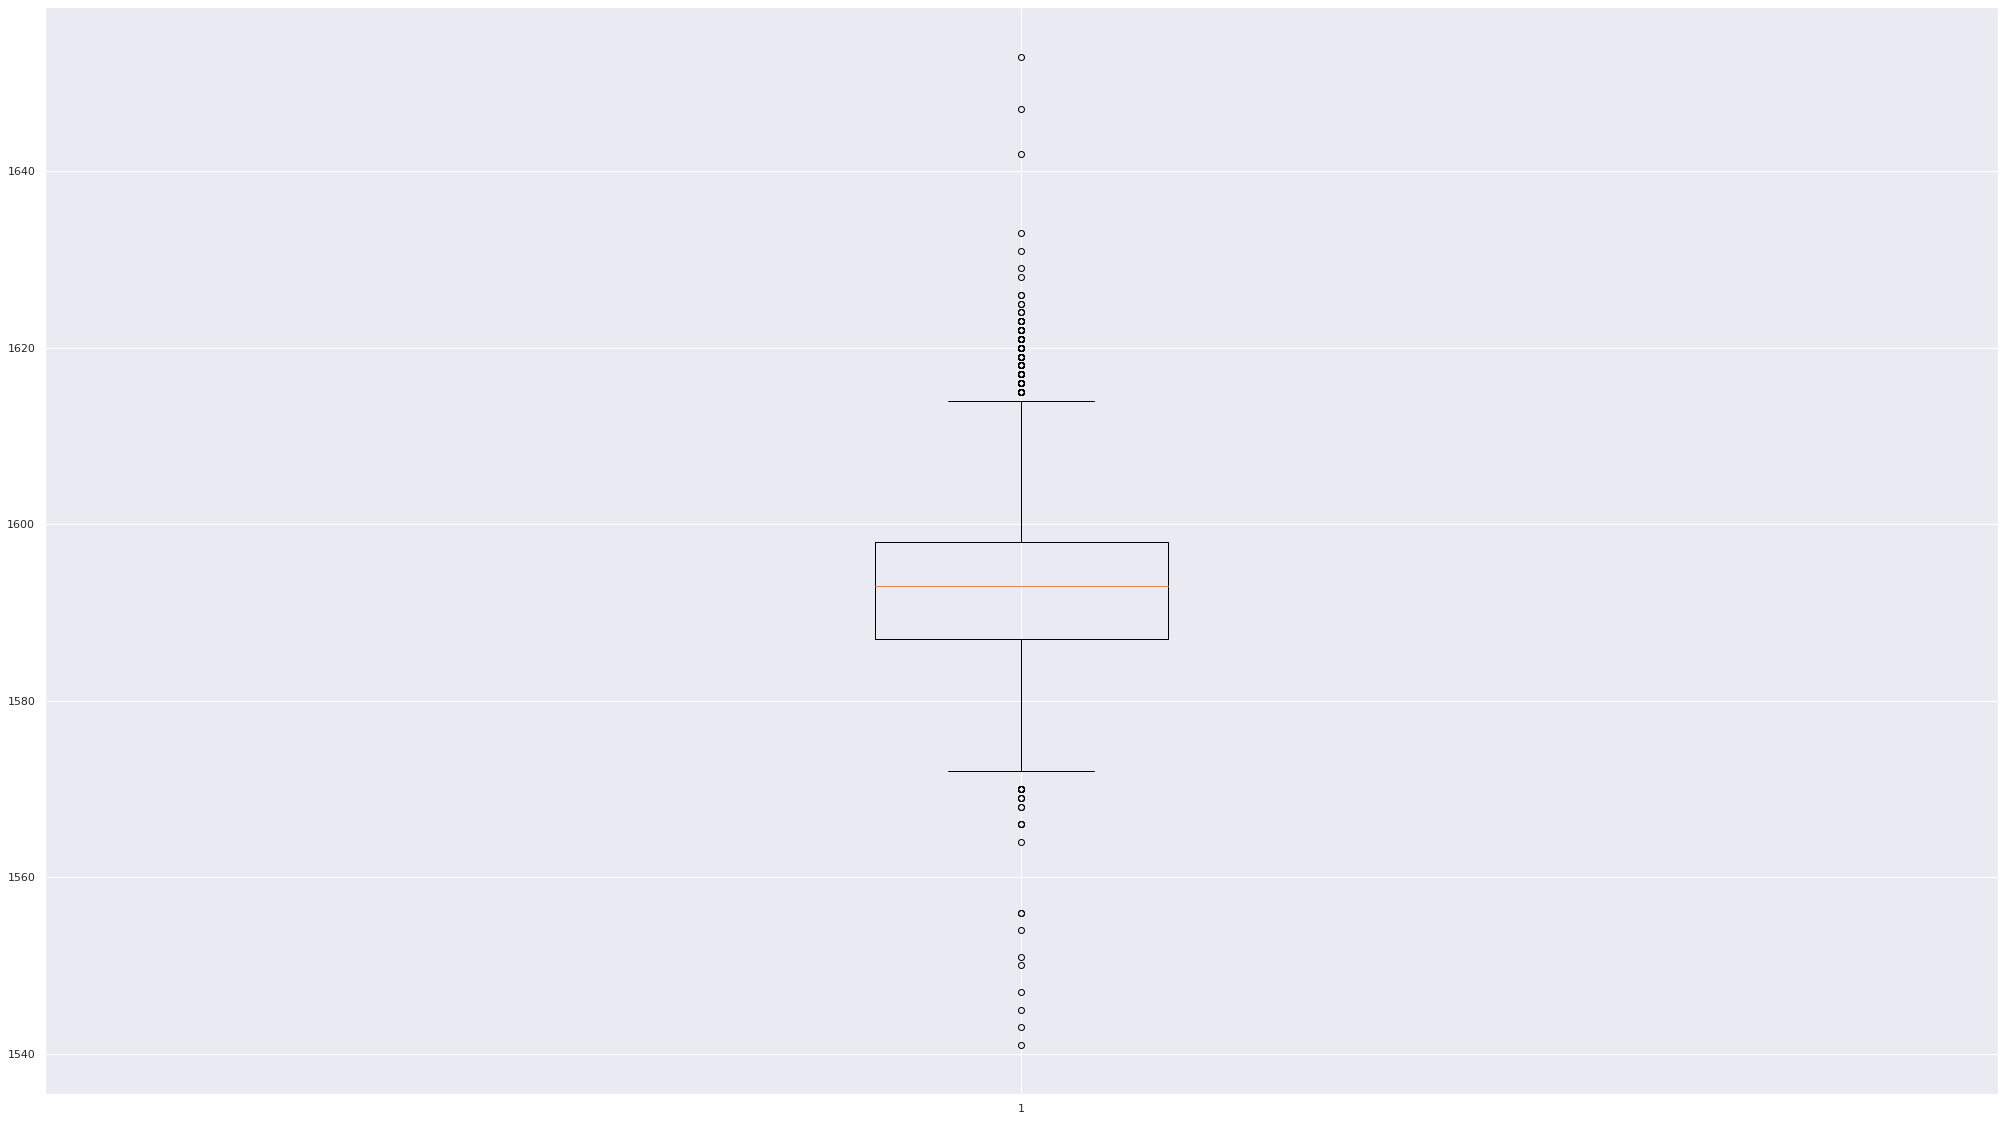

In [89]:
#диаграмма выбросов
boxplot = plt.boxplot(df['last_temp'])
outliers = list(boxplot['fliers'][0].get_data()[1])
#количество выбросов
print("Выбросы: ", len(outliers)) 
outliers = np.unique(np.array(outliers))
outliers

Удалим выбросы из таблицы.

In [90]:
#удаление выбросов
df =df.query('last_temp not in @outliers')

<div class="alert alert-info"> <b>Комментарий студента: </b> 
Вот тут у меня вопрос, правильно ли я удалил все выбросы в целевом признаке? или надо было только после разделения на выборки удалять только в трейне? Я и так и так пробовал. но во втором варианьте модель переобучается.  

И другой вопрос, когда я ищу выбросы через boxplot(код выше) то поиск не захватывает несколько значений, приходится boxplot перезапускать и удалять оставшиеся. Что я упустил?</div>

Разделим таблицу на признаки и целевой признак.

In [91]:
#разделение признаков
target = df['last_temp']
features = df.drop(['key','last_temp'],axis =1)

Построим тепловую карту корреляции.

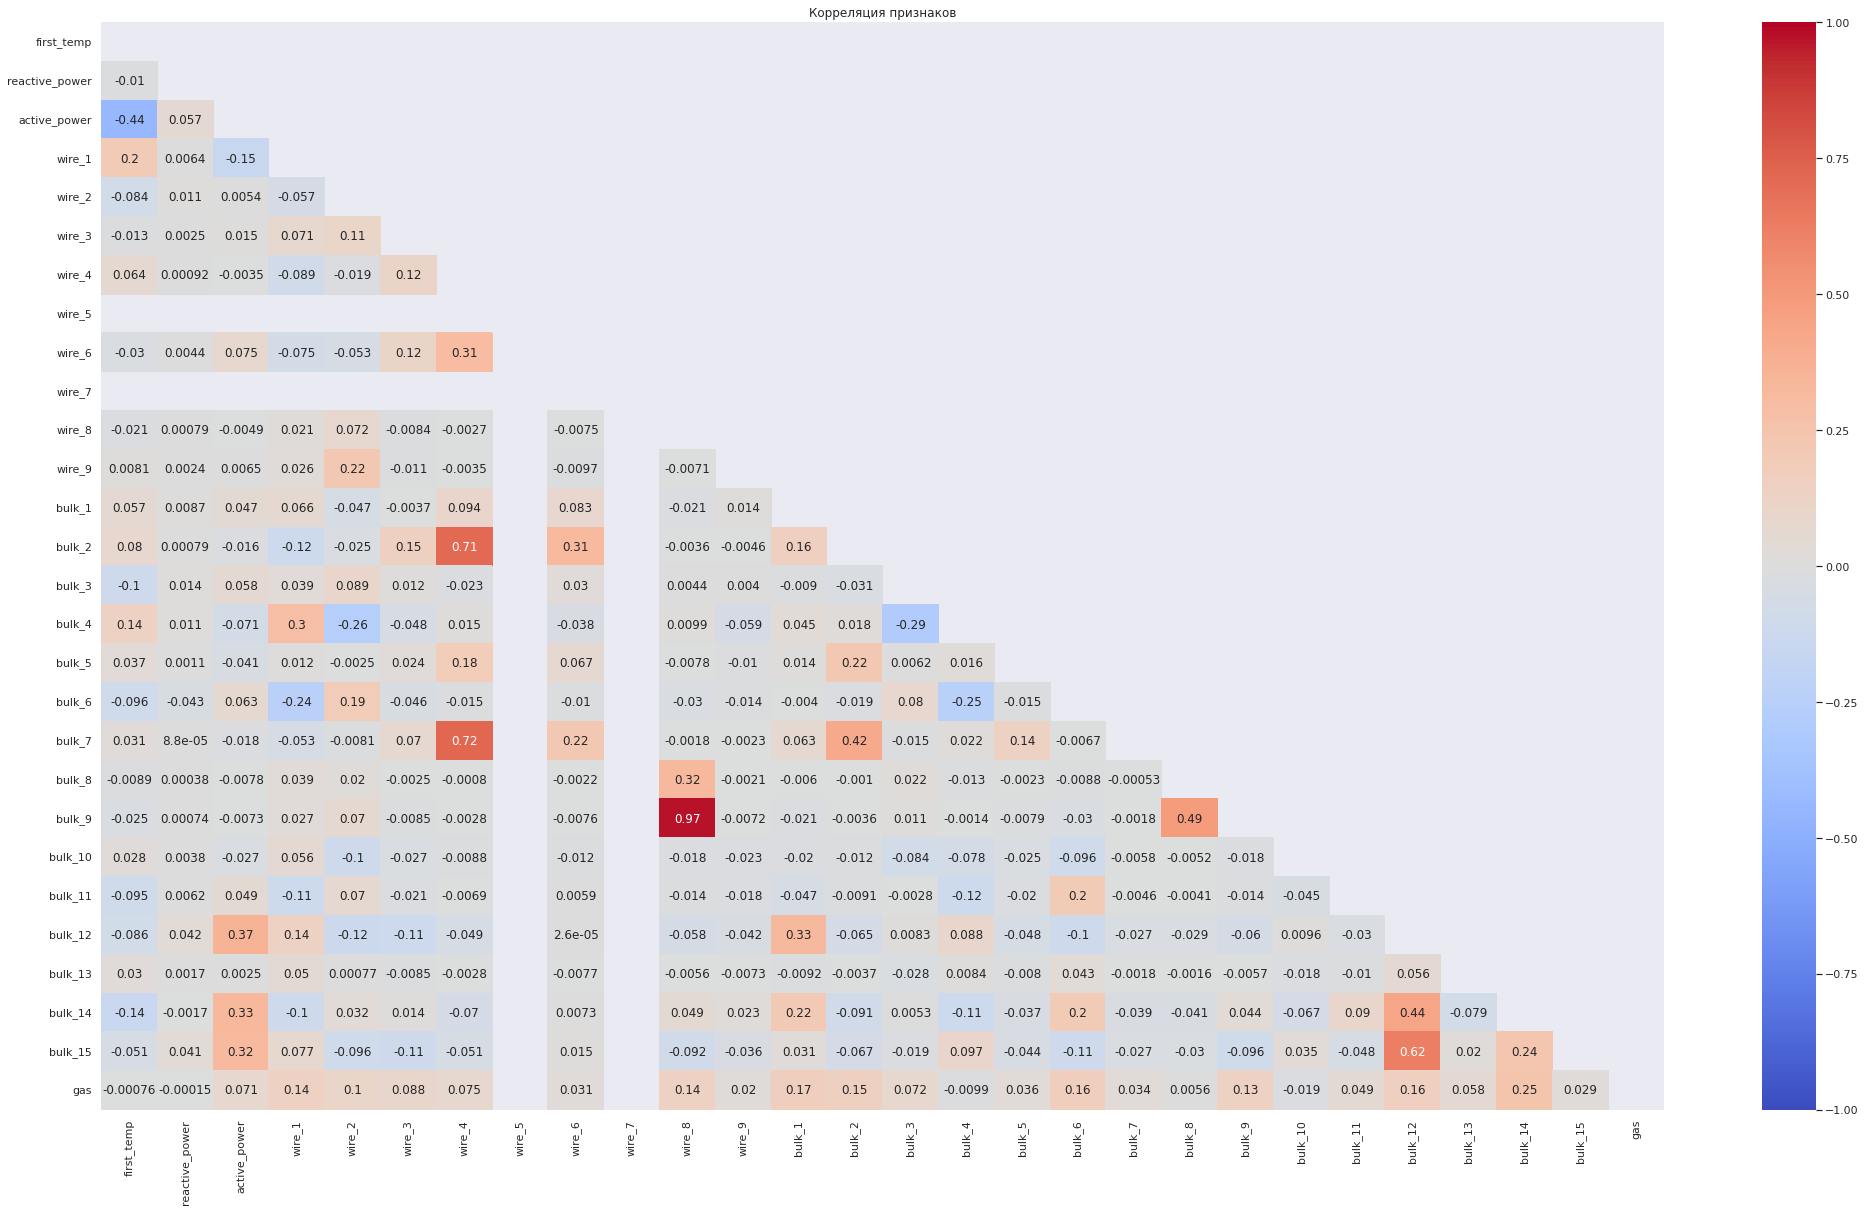

In [92]:
#выделим значения для сокрытия их в тепловой карте
upp_mat = np.triu(features.corr())
#построение тепловой карты корреляции признаков
sns.heatmap(features.corr(),vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
sns.set(rc = {'figure.figsize':(35,20)})
plt.title("Корреляция признаков")
plt.show()

Выделим признаки для удаления.

In [93]:
#Создание матрицы корреляции
corr_matrix = features.corr().abs()

#выбор верхнего угла матрицы корреляции
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#определение столбцов с корреляцией
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

Создадим новую таблицу без мультиколлинеарности. А также удалим пустые столбцы.

In [94]:
#новые признаки 
features_corr = features.drop(to_drop, axis =1)
features_corr.drop(['wire_5','wire_7'], inplace = True, axis = 1)

Проверим корелляцию в новой таблице

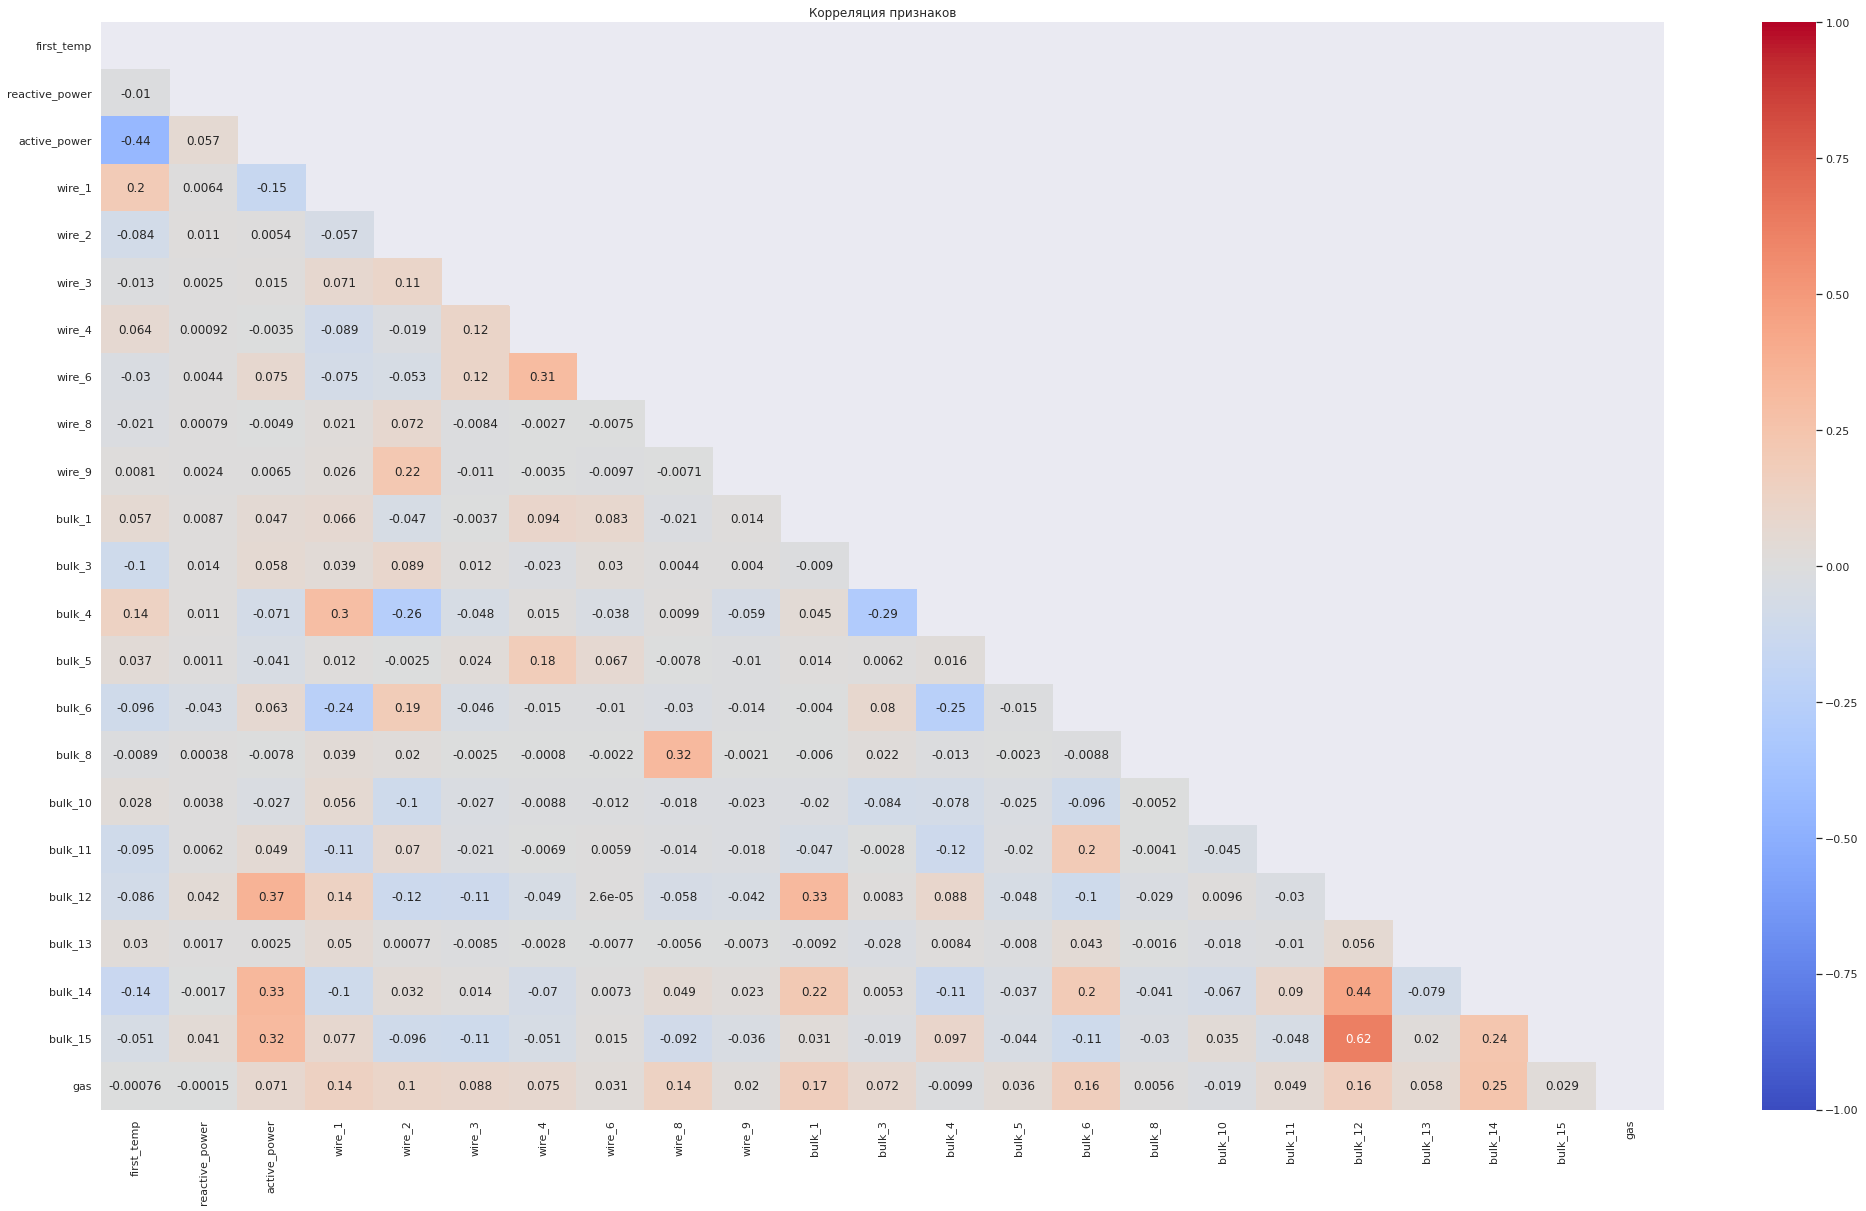

In [95]:
#выделим значения для сокрытия их в тепловой карте
upp_mat = np.triu(features_corr.corr())
#построение тепловой карты корреляции признаков
sns.heatmap(features_corr.corr(),vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
sns.set(rc = {'figure.figsize':(35,20)})
plt.title("Корреляция признаков")
plt.show()

Найдем столбцы где 95% составляет одно значение. Такие столбцы удалим.

In [96]:
#вывод столбцов с данными где одно значение составляет больше 95%
num_rows = len(features_corr.index)
low_information_cols = []

for col in features_corr.columns:
    cnts = features_corr[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

wire_3: 98.63014%
0.000000      2088
260.131897       2
231.591369       1
280.215942       1
293.188919       1
385.008668       1
278.101837       1
278.053802       1
285.116821       1
288.432144       1
282.089813       1
231.014801       1
244.468246       1
236.972740       1
231.495285       1
277.092834       1
250.041794       1
240.240005       1
260.083832       1
279.783508       1
277.044769       1
254.077850       1
231.110901       1
93.117027        1
94.990898        1
93.068977        1
88.648567        1
276.324066       1
97.008911        1
Name: wire_3, dtype: int64

wire_4: 99.85829%
0.000000     2114
43.065361       1
33.182243       1
58.046562       1
Name: wire_4, dtype: int64

wire_6: 98.25224%
0.000000      2080
25.053600        2
38.198162        2
18.086641        2
30.064323        1
145.139283       1
50.072884        1
65.036400        1
59.476566        1
20.214481        1
15.066482        1
34.011124        1
13.075921        1
81.132492        1
0

Удалим столбцы.

In [97]:
#удаление столбцов
features_corr.drop(low_information_cols,axis = 1, inplace = True)

Разделим признаки на выборки

In [98]:
#разделение признаков
features_train,features_test, target_train, target_test = train_test_split(features_corr,
                                                                           target,
                                                                           test_size = 0.2,
                                                                           random_state = 12092022)

 #### Модель

Приступим к поиску лучшей модели.  
Поиск лучшей модели будет происходить с помощью кросс-валидации.

In [99]:
#настройка параметров кросс валидации
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

Обучим модели и выведем результаты

In [100]:
#модель XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror')

param_xgbr = {
        'n_estimators':range(50,200,4),
        'max_depth':range(2,20,1),
        'learning_rate':np.linspace(0.001,2,20),
        'subsample':np.linspace(0.3,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1)
        }


rs_xgbr = RandomizedSearchCV(xgbr,
                             param_xgbr,
                             cv = cv,
                             scoring = 'neg_mean_absolute_error',
                             n_jobs = -1, 
                             verbose = 2)
 
#тренировка на тренировочном наборе
rs_xgbr.fit(features_train,target_train)

#параметры
best_estimator = rs_xgbr.best_estimator_
print(best_estimator)

#точность оптимального трейнера
print("XGBoost")
print(abs(rs_xgbr.best_score_))


Fitting 30 folds for each of 10 candidates, totalling 300 fits
XGBRegressor(colsample_bytree=0.8733333333333333,
             learning_rate=0.7374736842105264, max_depth=4, min_child_weight=7,
             n_estimators=126, objective='reg:squarederror',
             subsample=0.5526315789473685)
XGBoost
7.265393517354012


In [101]:
#модель LightGBM
lgbm = LGBMRegressor()

param_lgbm = {
    'num_leaves': range(50,200,10),
    'boosting_type' : ['gbdt'],
    'max_depth' : range(2,20,1),
    'random_state' : [12092022], 
    'learning_rate':np.linspace(0.001,2,20),
    'subsample':np.linspace(0.3,0.9,20),
    'colsample_bytree':np.linspace(0.5,0.98,10)
    }

rs_lgbm = RandomizedSearchCV(lgbm,
                             param_lgbm,
                             cv = cv,
                             scoring = 'neg_mean_absolute_error', 
                             n_jobs = -1, 
                             verbose = 2)
 
#тренировка на тренировочном наборе
rs_lgbm.fit(features_train,target_train)

#лучшие параметры
best_estimator = rs_lgbm.best_estimator_
print(best_estimator)

#точность оптимального трейнера
print("LightGBM")
print(abs(rs_lgbm.best_score_))

Fitting 30 folds for each of 10 candidates, totalling 300 fits
LGBMRegressor(colsample_bytree=0.6599999999999999,
              learning_rate=0.31663157894736843, max_depth=14, num_leaves=130,
              random_state=12092022, subsample=0.4578947368421053)
LightGBM
5.690827826414891


In [102]:
#модель случайного леса
model_rf = RandomForestRegressor(random_state = 12092022)

params = [{"n_estimators": range(10,101,10),
      "max_depth": range(1,16,2)}]
rs_rf = RandomizedSearchCV(model_rf,
                           params,
                           scoring='neg_mean_absolute_error',
                           cv=cv,
                           n_jobs = -1,
                           verbose = 2)
rs_rf.fit(features_train, target_train)

#тренировка на тренировочном наборе
rs_rf.fit(features_train,target_train)

#лучшие параметры
best_estimator = rs_rf.best_estimator_
print(best_estimator)

#точность оптимального трейнера
print("RandomForestRegressor")
print(abs(rs_rf.best_score_))


Fitting 30 folds for each of 10 candidates, totalling 300 fits
Fitting 30 folds for each of 10 candidates, totalling 300 fits
RandomForestRegressor(max_depth=13, n_estimators=60, random_state=12092022)
RandomForestRegressor
5.299054056764004


In [111]:
# модель CatBoost
ctb_model = CatBoostRegressor(verbose = 0, n_estimators=300, loss_function='MAE')

grid = {'learning_rate': [0.001, 0.05, 1],
        'depth': [2, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

randomized_search_result = ctb_model.randomized_search(grid,
                                                   cv = cv,
                                                   X=features_train,
                                                   y=target_train,
                                                   verbose = 0)
#тренировка на тренировочном наборе
ctb_model.fit(features_train,target_train)

#лучшие параметры
print(ctb_model.get_params())

# Вывод точности трейнера
print("CatBoostRegressor")
ctb_model.get_best_score()


bestTest = 1179.484253
bestIteration = 299


bestTest = 5.192578389
bestIteration = 290


bestTest = 5.477876204
bestIteration = 15


bestTest = 1179.485057
bestIteration = 299


bestTest = 9.096663092
bestIteration = 232


bestTest = 5.702063611
bestIteration = 5


bestTest = 1180.834453
bestIteration = 299


bestTest = 33.88733331
bestIteration = 299


bestTest = 24.40707869
bestIteration = 1


bestTest = 31.2841734
bestIteration = 299

Training on fold [0/30]

bestTest = 4.816035841
bestIteration = 298

Training on fold [1/30]

bestTest = 5.811678619
bestIteration = 275

Training on fold [2/30]

bestTest = 6.078636725
bestIteration = 295

Training on fold [3/30]

bestTest = 5.919426475
bestIteration = 299

Training on fold [4/30]

bestTest = 5.071861927
bestIteration = 290

Training on fold [5/30]

bestTest = 5.157296023
bestIteration = 299

Training on fold [6/30]

bestTest = 4.953150343
bestIteration = 282

Training on fold [7/30]

bestTest = 5.520038666
bestIteration = 293

Trai

{'learn': {'MAE': 4.890089718839966}}

Мы видим что модель CatBoostRegressor показала наилучший результат на тренировочной модели.  
Проверим значение метрики MAE на тестовой выборке.


In [112]:
#подсчет MAE и вывод на экран
predictions = ctb_model.predict(features_test)
print('CatBoost test MAE:')
print(mean_absolute_error(predictions, target_test))

CatBoost test MAE:
5.893025866682071


Определим важность признаков в процессе обучении модели CatBoost.

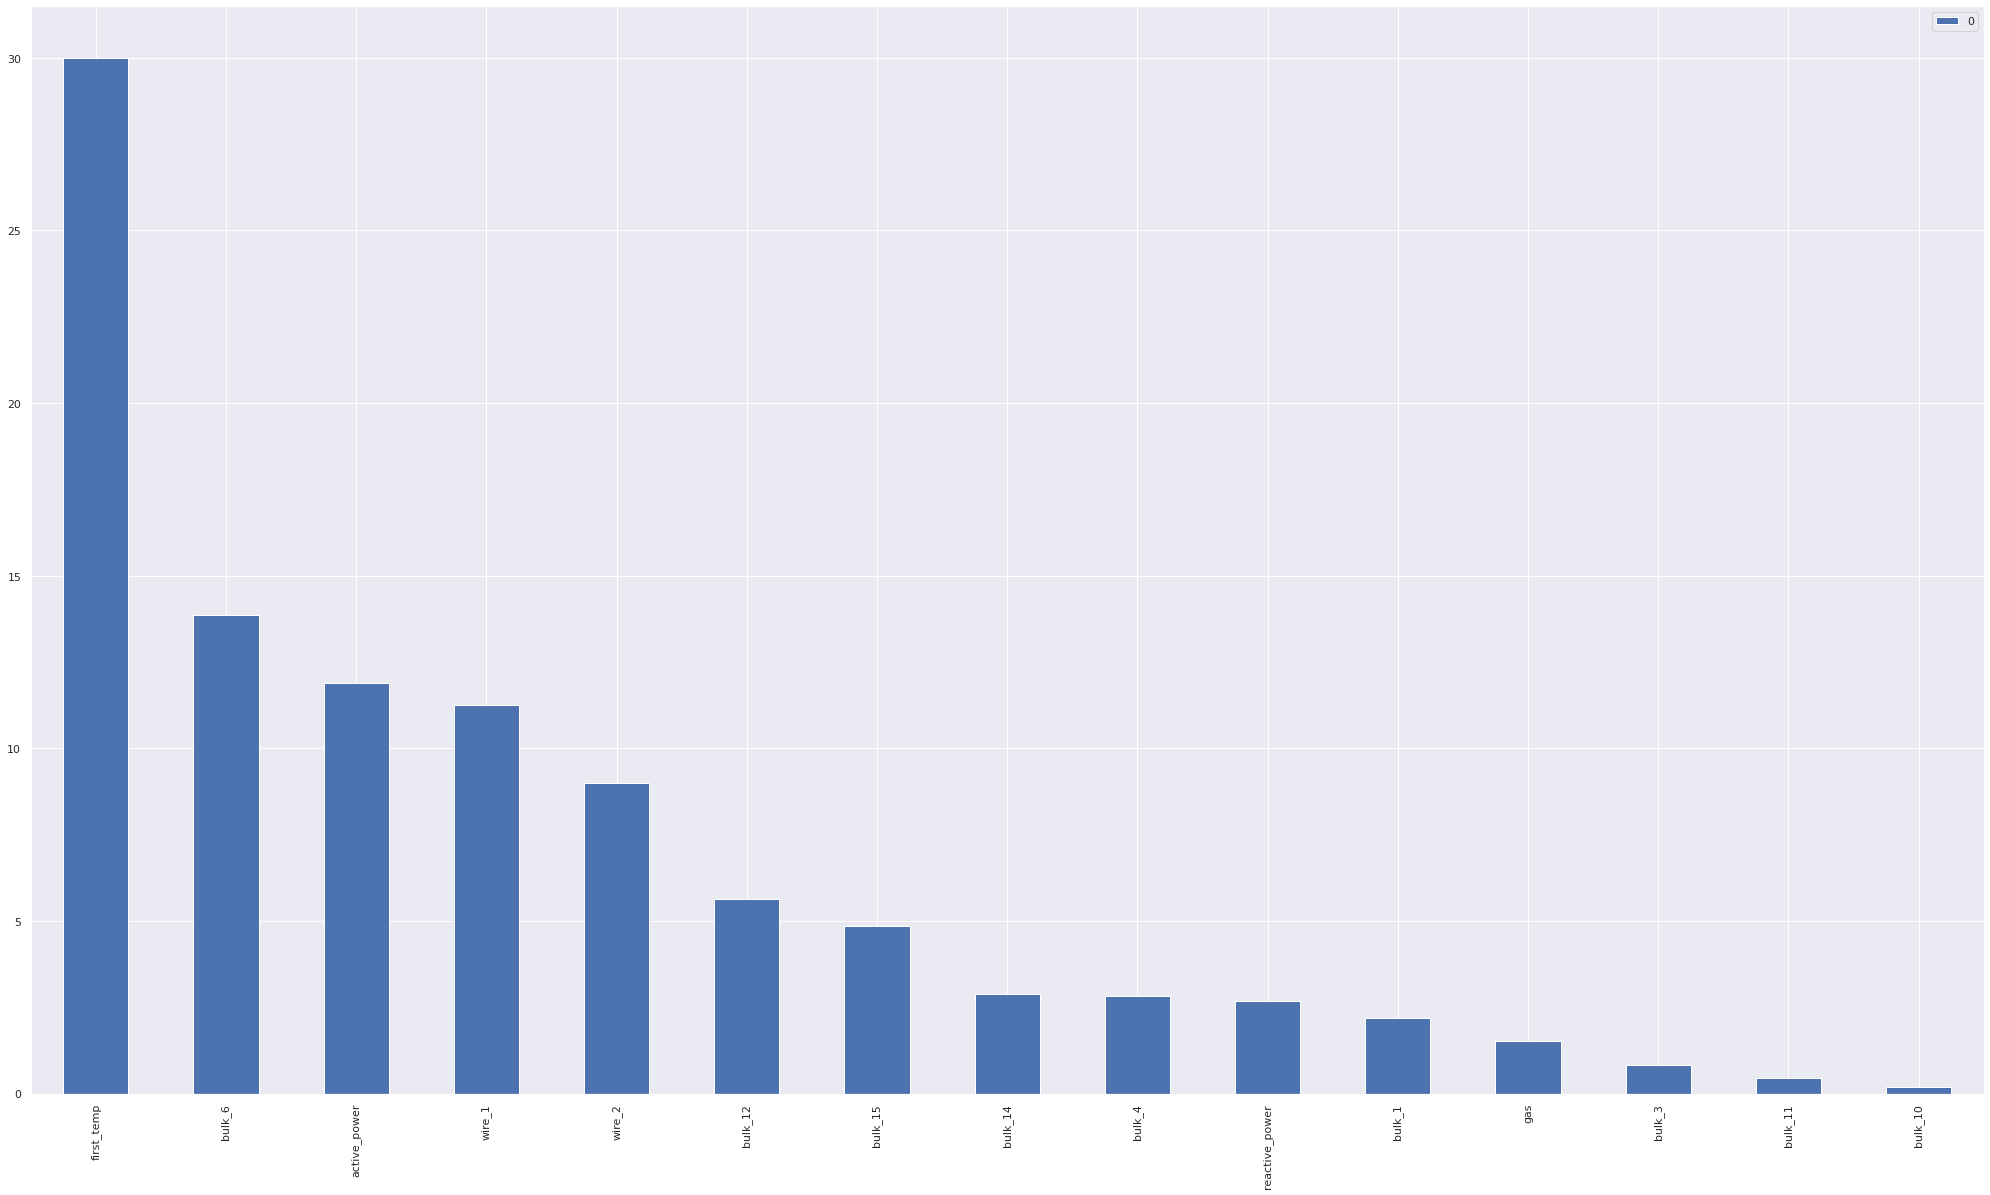

In [105]:
#диограмма важности признаков
feature_importance = pd.Series(ctb_model.feature_importances_, index=features_train.columns).sort_values(ascending=False).to_frame()
feature_importance.plot(kind = 'bar',)

In [106]:
"""
fig = go.Figure()
fig.add_trace(go.Scatter(y = target_test,  name = "Реальные",  mode='lines',))
fig.add_trace(go.Scatter(y = predictions,  name = "Предсказанные", mode='lines',))
fig.show()
"""

'\nfig = go.Figure()\nfig.add_trace(go.Scatter(y = target_test,  name = "Реальные",  mode=\'lines\',))\nfig.add_trace(go.Scatter(y = predictions,  name = "Предсказанные", mode=\'lines\',))\nfig.show()\n'